<a href="https://colab.research.google.com/github/chandruCS165/Classification-Approach-for-Time-Granular-Traffic-in-SDWMN-/blob/main/KNN_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
uploaded = []
uploaded.append(files.upload())

Saving 802_15_4_MACperf_5s.csv to 802_15_4_MACperf_5s (1).csv
Saving 802_15_4_MACperf_10s.csv to 802_15_4_MACperf_10s (1).csv
Saving 802_15_4_MACperf_15s.csv to 802_15_4_MACperf_15s (1).csv
Saving 802_15_4_MACperf_20s.csv to 802_15_4_MACperf_20s (1).csv
Saving 802_15_4_MACperf_25s.csv to 802_15_4_MACperf_25s (1).csv
Saving 802_15_4_MACperf_30s.csv to 802_15_4_MACperf_30s (1).csv
Saving 802_15_4_MACperf_35s.csv to 802_15_4_MACperf_35s (1).csv
Saving 802_15_4_MACperf_40s.csv to 802_15_4_MACperf_40s (1).csv
Saving 802_15_4_MACperf_45s.csv to 802_15_4_MACperf_45s (1).csv
Saving 802_15_4_MACperf_50s.csv to 802_15_4_MACperf_50s (1).csv
Saving 802_15_4_MACperf_55s.csv to 802_15_4_MACperf_55s (1).csv
Saving 802_15_4_MACperf_60s.csv to 802_15_4_MACperf_60s (1).csv


# **Fine  K Nearest Neighbor (F_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  KNN = KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.993862178570553
10sec OTP dataset:    Accuracy is  0.9906079750949962
15sec OTP dataset:    Accuracy is  0.9884937685787394
20sec OTP dataset:    Accuracy is  0.9858136775492593
Average accuracy of fine Granular OTP dataset 0.9896943999483869
45sec OTP dataset:    Accuracy is  0.9769048630927084
50sec OTP dataset:    Accuracy is  0.9791972168187939
55sec OTP dataset:    Accuracy is  0.9790903319426809
60sec OTP dataset:    Accuracy is  0.9743344783168743
Average accuracy of coarse Granular OTP dataset 0.9773817225427645
Average Accuracy  0.9835380612455757


# **Medium K Nearest Neighbors (M_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  KNN = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.9906017584141589
10sec OTP dataset:    Accuracy is  0.9860353431305224
15sec OTP dataset:    Accuracy is  0.9834838024429103
20sec OTP dataset:    Accuracy is  0.9826298000862936
Average accuracy of fine Granular OTP dataset 0.9856876760184714
45sec OTP dataset:    Accuracy is  0.9719689150628378
50sec OTP dataset:    Accuracy is  0.9749289241358671
55sec OTP dataset:    Accuracy is  0.9763921639760567
60sec OTP dataset:    Accuracy is  0.9736474881923571
Average accuracy of coarse Granular OTP dataset 0.9742343728417797
Average Accuracy  0.9799610244301256


# **Coarse K Nearest Neighbor (C_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  KNN = KNeighborsClassifier(n_neighbors=100,metric = 'euclidean')
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.9751932866492895
10sec OTP dataset:    Accuracy is  0.9734303895984985
15sec OTP dataset:    Accuracy is  0.966592754033009
20sec OTP dataset:    Accuracy is  0.9664910829857616
Average accuracy of fine Granular OTP dataset 0.9704268783166397
45sec OTP dataset:    Accuracy is  0.961508105154514
50sec OTP dataset:    Accuracy is  0.9596289091725273
55sec OTP dataset:    Accuracy is  0.9628967894068566
60sec OTP dataset:    Accuracy is  0.9618720480893087
Average accuracy of coarse Granular OTP dataset 0.9614764629558016
Average Accuracy  0.9659516706362206


# **Cosine K Nearest Neighbor (Cos_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  KNN = KNeighborsClassifier(n_neighbors=5,metric='cosine')
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.9938622194259006
10sec OTP dataset:    Accuracy is  0.9902374521204351
15sec OTP dataset:    Accuracy is  0.9888655157906351
20sec OTP dataset:    Accuracy is  0.9872812694760056
Average accuracy of fine Granular OTP dataset 0.9900616142032441
45sec OTP dataset:    Accuracy is  0.9774634205573433
50sec OTP dataset:    Accuracy is  0.9773604668562023
55sec OTP dataset:    Accuracy is  0.9770542354434972
60sec OTP dataset:    Accuracy is  0.9743559467582653
Average accuracy of coarse Granular OTP dataset 0.976558517403827
Average Accuracy  0.9833100658035356


# **Cubic K Nearest Neighbor (Cu_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  KNN = KNeighborsClassifier(n_neighbors=10,p=3)
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.9898986378827125
10sec OTP dataset:    Accuracy is  0.985665277968533
15sec OTP dataset:    Accuracy is  0.9814426412673891
20sec OTP dataset:    Accuracy is  0.981159811112709
Average accuracy of fine Granular OTP dataset 0.9845415920578359
45sec OTP dataset:    Accuracy is  0.9736081597960051
50sec OTP dataset:    Accuracy is  0.9749326649708214
55sec OTP dataset:    Accuracy is  0.9764057681842916
60sec OTP dataset:    Accuracy is  0.97652962644912
Average accuracy of coarse Granular OTP dataset 0.9753690548500595
Average Accuracy  0.9799553234539478


# **Weighted K Nearest Neighbor (W_KNN)**

In [ ]:
accuracies = []
acc = []
for j in range(5,65,5):
  if(j >= 25 and j<= 40):
    continue
  #UPLOADING THE TRAIN DATASET
  X = pd.read_csv('802_15_4_MACperf_'+str(j)+'s.csv')


  #DATA PREPROCESSING
  X = X.sample(frac = 1)
  Y = X['COR'].values
  kf = KFold(n_splits=10)

  X_ = X.drop("COR", axis=1)
  X_ = preprocessing.StandardScaler().fit(X_).transform(X_)
  label = preprocessing.LabelEncoder()
  label.fit([0,20])
  Y_ = label.transform(Y) 
  scores = []
  W = 1.65
  KNN = KNeighborsClassifier(n_neighbors=15,weights='distance')
  for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X_[train],X_[test],Y_[train],Y_[test]
    KNN.fit(X_train,Y_train)
    scores.append(KNN.score(X_test,Y_test))
  accuracy = np.mean(scores)
  accuracies.append(accuracy)
  print(str(j)+"sec OTP dataset:","   Accuracy is ",accuracy)
  if(j == 20):
    print("Average accuracy of fine Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
  if(j == 60):
    print("Average accuracy of coarse Granular OTP dataset",np.mean(accuracies))
    acc.append(np.mean(accuracies))
    accuracies = []
print("Average Accuracy ",np.mean(acc))

5sec OTP dataset:    Accuracy is  0.992967160471634
10sec OTP dataset:    Accuracy is  0.9906081276991866
15sec OTP dataset:    Accuracy is  0.9875644005489995
20sec OTP dataset:    Accuracy is  0.9867904741358646
Average accuracy of fine Granular OTP dataset 0.9894825407139212
45sec OTP dataset:    Accuracy is  0.9802076376662013
50sec OTP dataset:    Accuracy is  0.9798107137513092
55sec OTP dataset:    Accuracy is  0.9824641755849809
60sec OTP dataset:    Accuracy is  0.979443967367969
Average accuracy of coarse Granular OTP dataset 0.9804816235926151
Average Accuracy  0.9849820821532682


# **Other**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = pd.read_csv('802_15_4_MACperf_40s.csv')
X = X.sample(frac = 1)
Y = X['COR'].values
X = X.drop("COR", axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(1640, 7)
(1640,)
(411, 7)
(411,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9914634146341463
Test set Accuracy :  0.9829683698296837


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9695121951219512
Test set Accuracy :  0.948905109489051


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2,metric='cosine')
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9908536585365854
Test set Accuracy :  0.9781021897810219


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9658536585365853
Test set Accuracy :  0.9464720194647201


In [ ]:

neigh = KNeighborsClassifier(n_neighbors=2,metric=lambda u, v: np.cbrt(np.absolute((u-v)**3).sum()))
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9914634146341463
Test set Accuracy :  0.9854014598540146


In [ ]:
W = [0.30,0.10,0.06,0.15,0.20,0.09,0.10]
neigh = KNeighborsClassifier(n_neighbors=2,metric=lambda u, v: np.sqrt(W*(u-v)**2).sum())
neigh.fit(X_train, Y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy : ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accuracy : ",metrics.accuracy_score(Y_test,yhat6))

Train set Accuracy :  0.9908536585365854
Test set Accuracy :  0.975669099756691


In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
clf = svm.SVC(C = 0.1,kernel='rbf')
clf.fit(X_train, Y_train) 
yhat = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       283
          20       0.93      0.71      0.81       128

    accuracy                           0.89       411
   macro avg       0.91      0.84      0.87       411
weighted avg       0.90      0.89      0.89       411

Confusion matrix, without normalization
[[276   7]
 [ 37  91]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8929440389294404

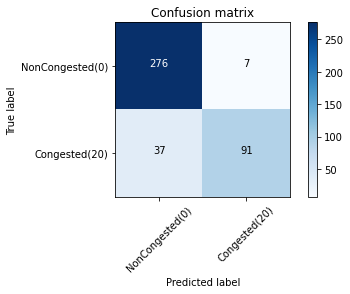

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,20])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NonCongested(0)','Congested(20)'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
f1_score(Y_test, yhat, average='weighted') 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)